In [1]:
#RNN Stock price prediction

In [2]:
from datetime import date

today = date.today()

In [3]:
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
stock_ticker='AAPL'
start = pd.to_datetime(['2007-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-08-11']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
print(url)
df = pd.read_csv(url)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1167609600&period2=1660176000&interval=1d&events=history


,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,3.081786,3.092143,2.925000,2.992857,2.555398,1238319600
1,2007-01-04,3.001786,3.069643,2.993571,3.059286,2.612116,847260400
2,2007-01-05,3.063214,3.078571,3.014286,3.037500,2.593514,834741600
3,2007-01-08,3.070000,3.090357,3.045714,3.052500,2.606323,797106800
4,2007-01-09,3.087500,3.320714,3.041071,3.306071,2.822829,3349298400
...,...,...,...,...,...,...,...
3924,2022-08-04,166.009995,167.190002,164.429993,165.809998,165.580002,55474100
3925,2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600
3926,2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900
3927,2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500


In [5]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
3928,2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500


In [6]:
df=df.set_index('Date')

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,3.081786,3.092143,2.925000,2.992857,2.555398,1238319600
2007-01-04,3.001786,3.069643,2.993571,3.059286,2.612116,847260400
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.593514,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.606323,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.822829,3349298400
...,...,...,...,...,...,...
2022-08-04,166.009995,167.190002,164.429993,165.809998,165.580002,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900


In [8]:
df.shape


(3929, 6)

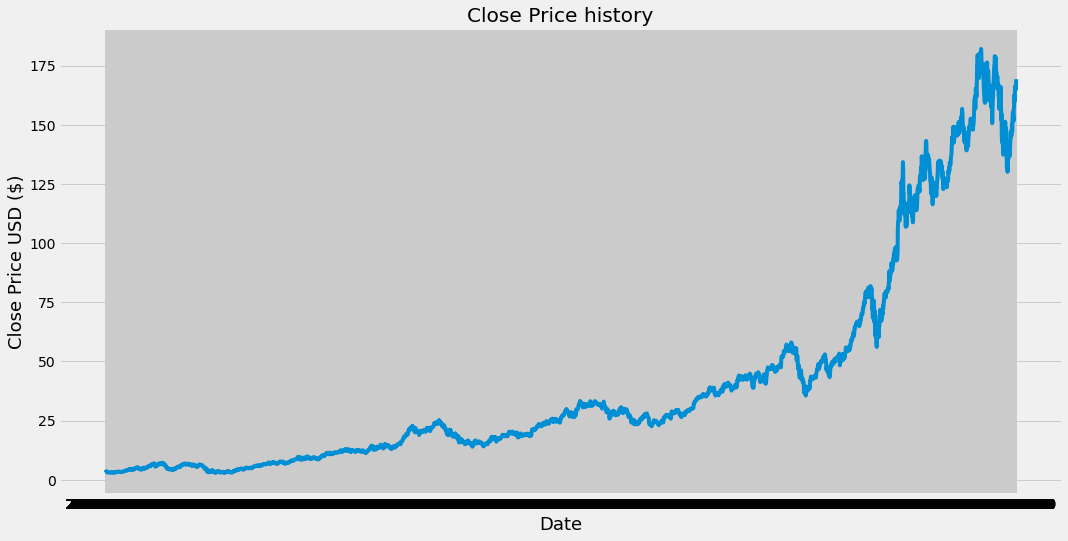

In [9]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
import math

In [11]:
#Create a new dataframe with only the Close Column
data=df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset=data.values
training_data_len=math.ceil(len(dataset) *0.8)
training_data_len

3144

In [12]:
#Scale the data - make the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00111596],
       [0.00148663],
       [0.00136506],
       ...,
       [0.90436183],
       [0.90464083],
       [0.92874571]])

In [13]:
#create the training data set
#create the scaled training data set

train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

#create array by 60 passthrough split data
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00111596, 0.00148663, 0.00136506, 0.00144876, 0.00286364,
       0.00374646, 0.00350732, 0.00327217, 0.00376638, 0.00333793,
       0.00216617, 0.00205258, 0.00171181, 0.00149459, 0.00169388,
       0.0016042 , 0.00143083, 0.00154243, 0.0014647 , 0.00150058,
       0.00130329, 0.00130528, 0.00114386, 0.00118571, 0.00158427,
       0.00159025, 0.00101035, 0.00133119, 0.00129532, 0.00141489,
       0.00139695, 0.00132122, 0.00153445, 0.00219207, 0.00225385,
       0.00216617, 0.00205457, 0.00114187, 0.00127738, 0.00176562,
       0.0014368 , 0.00161815, 0.0019908 , 0.00189714, 0.00195294,
       0.00194696, 0.00232559, 0.00203265, 0.0023515 , 0.00226581,
       0.00226979, 0.00257668, 0.00264643, 0.00312271, 0.00314064,
       0.00305296, 0.00351728, 0.00343957, 0.00299716, 0.00309879])]
[0.0029313993397216288]



In [14]:
#Convert the x_train and y_train to numpy arrays

x_train,y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3084, 60, 1)

In [15]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3084/3084 [==============================] - 87s 27ms/step - loss: 1.1549e-04


In [18]:
#Create the testing data set
#Create a new array containing scaled values

test_data = scaled_data[training_data_len - 60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i,0])

In [19]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [20]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#Get the models predicted price values
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [22]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions- y_test)**2)
rmse

0.6092191305950186

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


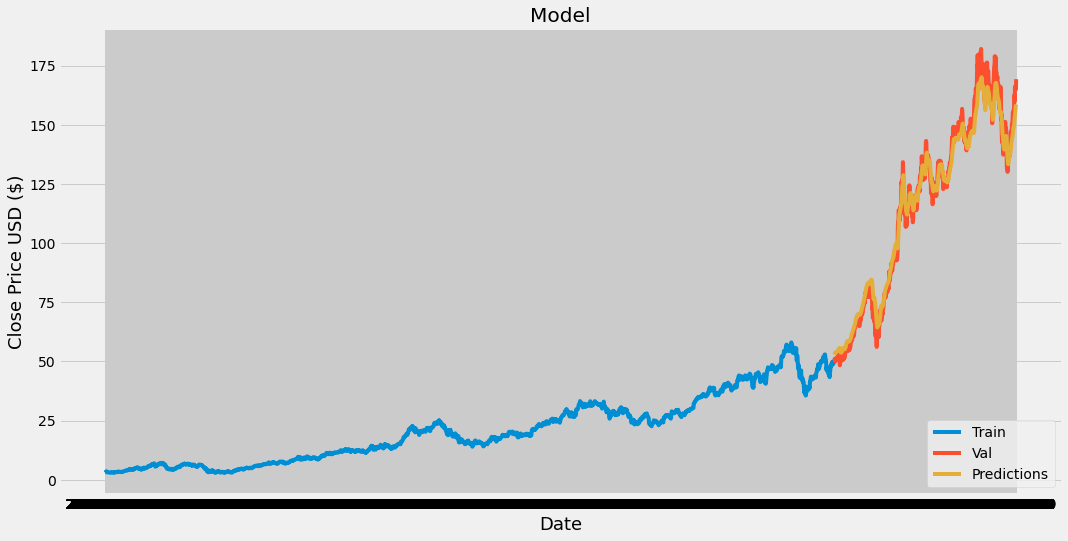

In [23]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
#Show the valud and predicted prices
valid

,Close,Predictions
Date,,
2019-07-01,50.387501,52.842144
2019-07-02,50.682499,52.983276
2019-07-03,51.102501,53.190113
2019-07-05,51.057499,53.458271
2019-07-08,50.005001,53.707806
...,...,...
2022-08-04,165.809998,155.406631
2022-08-05,165.350006,156.672150
2022-08-08,164.869995,157.614349


In [25]:
#predict the next day price
#get the data from values of the stock prices
apple_quote = df
apple_quote

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,3.081786,3.092143,2.925000,2.992857,2.555398,1238319600
2007-01-04,3.001786,3.069643,2.993571,3.059286,2.612116,847260400
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.593514,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.606323,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.822829,3349298400
...,...,...,...,...,...,...
2022-08-04,166.009995,167.190002,164.429993,165.809998,165.580002,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900


In [26]:
#predict the stock price for a date
apple_quote = df.filter(['Close'])
#get the last 60day closing price values and convert the dataframe to an array
last_60_days = apple_quote[-60:].values
#Scale the data to be values between 0
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60days
X_test.append(last_60_days_scaled)
#Covert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[159.34372]]


In [27]:

#Check the closing price
start = pd.to_datetime(['2022-08-12']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-08-13']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
df['Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


0    172.100006
Name: Close, dtype: float64